In [2]:
#import pandas to read the training data csv file
import pandas as pd

df = pd.read_csv("C:/Users/Dear/Desktop/Titanic_Project/projenv/train.xls")
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
#check for missing data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Import matplotlib for visualizing

%matplotlib inline
import matplotlib.pyplot as plt

Now, we see how some characteristics/features affect the survival of a passenger.

[Text(0.5, 1.0, 'Survival Rate according to the Sex')]

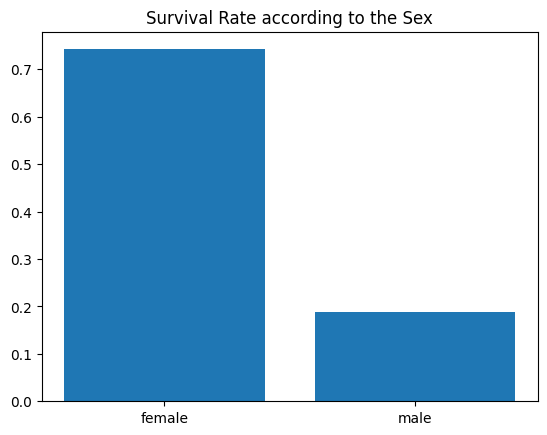

In [5]:
#get the survival rate based on Sex
survival_rate_by_sex = df.groupby("Sex")["Survived"].mean()

fig, ax = plt.subplots()
ax.bar(survival_rate_by_sex.index, survival_rate_by_sex.values)
ax.set(title="Survival Rate according to the Sex")

As you've seen, there is a higher chance for females to survive than males. This is an important feature that should be taken in consideration that'll help the model predict the result

For age feature, we care for age groups, i.e childreen, teenagers, young adults, adults, and seniors, that's why we will bin age into groups. We will fill the missing age values first, then bin age into groups

C:\Users\Dear\AppData\Local\Temp\ipykernel_12400\2136403716.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age = df.groupby("Age Group")["Survived"].mean()


[Text(0.5, 1.0, 'Survival Rate according to the Age')]

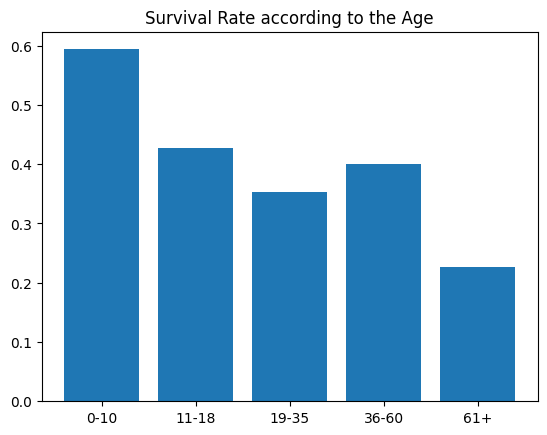

In [6]:
#fill the missing age values with the median value of age
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

df["Age"] = imputer.fit_transform(df[["Age"]])

bins = [0, 10, 18, 35, 60, 80]
labels = ["0-10", "11-18", "19-35", "36-60", "61+"]

#we care about age group rather than a specific age e.g. we test whether children had a higher probability to survive than adults
df["Age Group"] = pd.cut(df["Age"], 
                         bins=bins,
                         labels=labels,
                         right=True)


survival_rate_by_age = df.groupby("Age Group")["Survived"].mean()

fig, ax = plt.subplots()
ax.bar(survival_rate_by_age.index, survival_rate_by_age.values)
ax.set(title="Survival Rate according to the Age")

Another feature is the class of ticket of a passenger, it gives a view about the financial state of the passenger.

[Text(0.5, 1.0, 'Survival Rate according to the Ticket Class')]

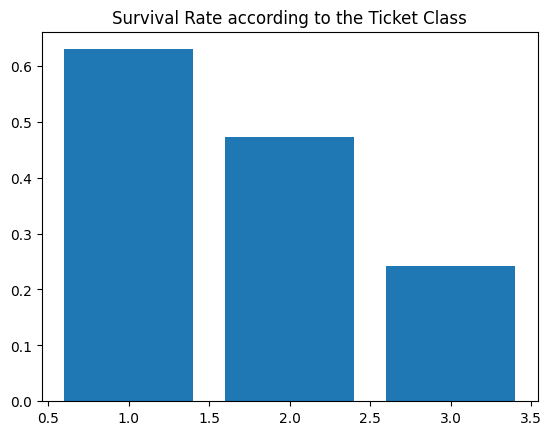

In [7]:
survival_rate_by_ticket_class = df.groupby("Pclass")["Survived"].mean()

fig, ax = plt.subplots()
ax.bar(survival_rate_by_ticket_class.index, survival_rate_by_ticket_class.values)
ax.set(title="Survival Rate according to the Ticket Class")

[Text(0.5, 1.0, 'Survival Rate according to Number of Sibling/Spouce abroad')]

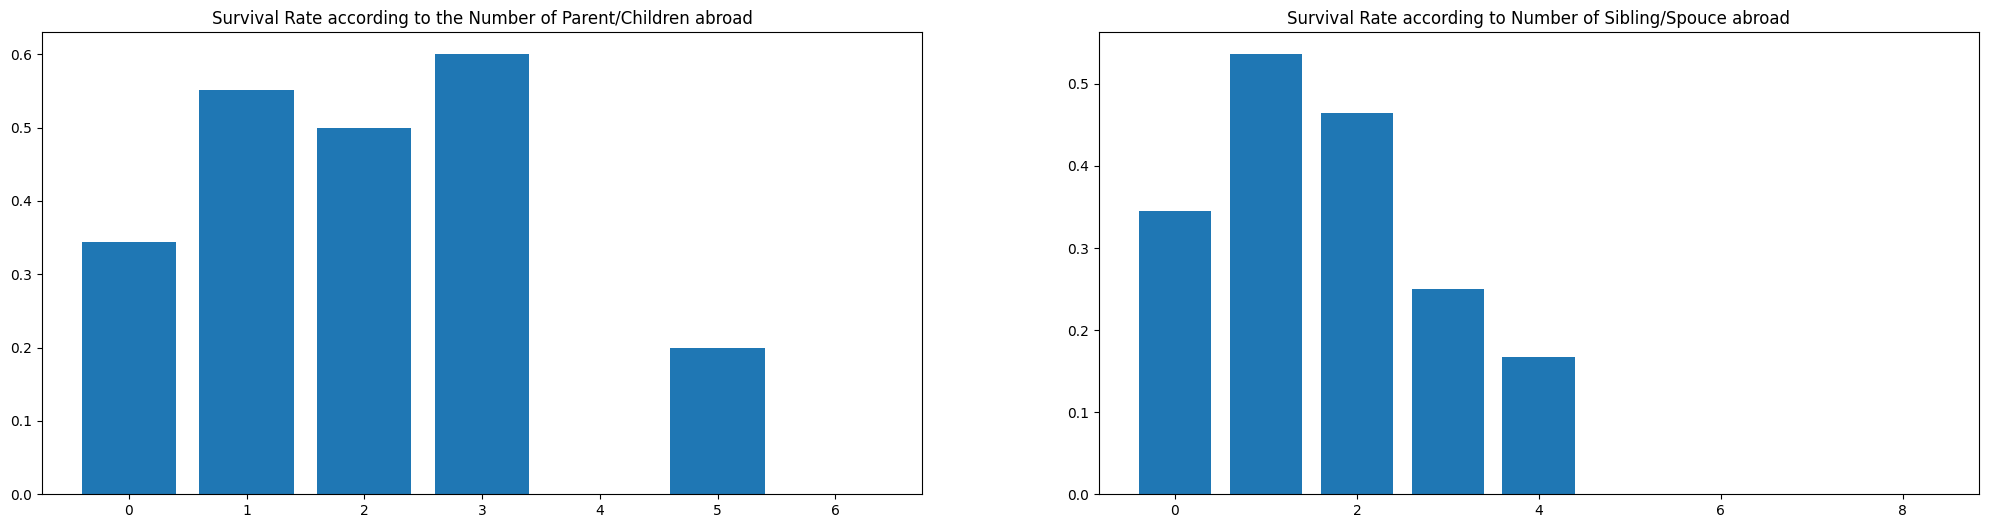

In [8]:
survival_rate_by_Parch = df.groupby("Parch")["Survived"].mean()
survival_rate_by_SibSp = df.groupby("SibSp")["Survived"].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
axes[0].bar(survival_rate_by_Parch.index, survival_rate_by_Parch.values)
axes[0].set(title="Survival Rate according to the Number of Parent/Children abroad")

axes[1].bar(survival_rate_by_SibSp.index, survival_rate_by_SibSp.values)
axes[1].set(title="Survival Rate according to Number of Sibling/Spouce abroad")

C:\Users\Dear\AppData\Local\Temp\ipykernel_12400\2673129618.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_fare = df.groupby("Fare Groups")["Survived"].mean()


[Text(0.5, 1.0, 'Survival Rate according to Fare')]

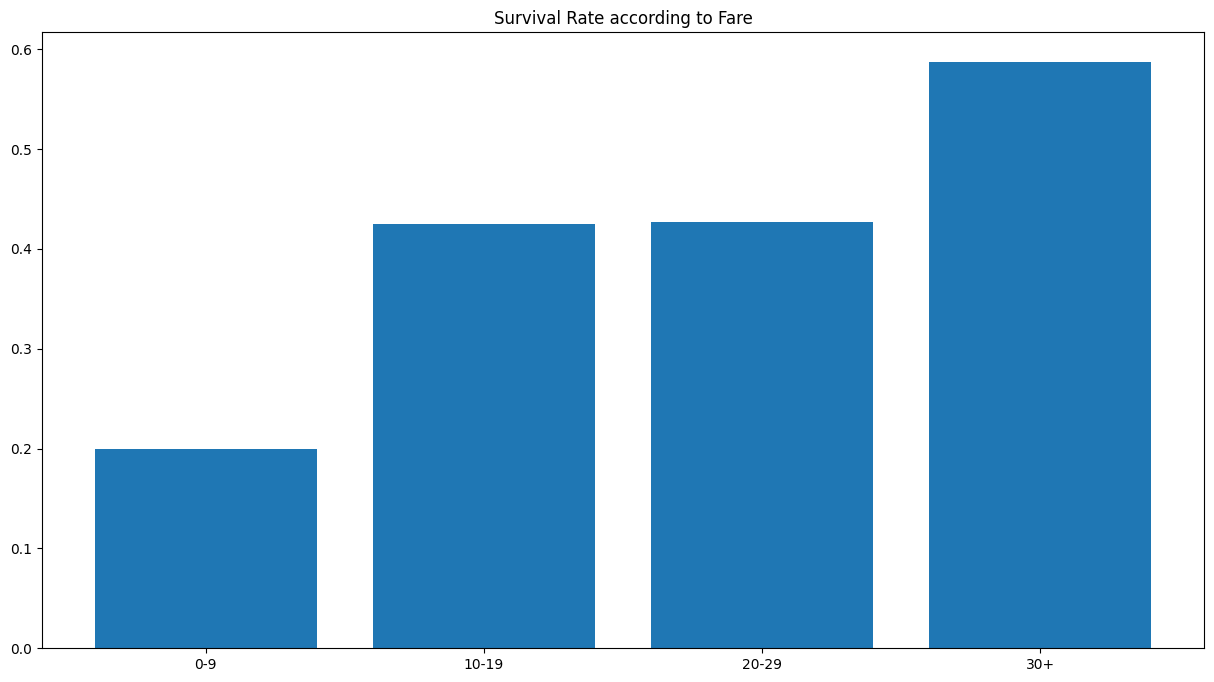

In [9]:
bins = [0, 10, 20, 30, 600]
labels = ["0-9", "10-19", "20-29", "30+"]

df["Fare Groups"] = pd.cut(df["Fare"], 
                           bins=bins, 
                           labels=labels, 
                           right=False)

survival_rate_by_fare = df.groupby("Fare Groups")["Survived"].mean()

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(survival_rate_by_fare.index, survival_rate_by_fare.values)
ax.set(title="Survival Rate according to Fare")

[Text(0.5, 1.0, 'Survival Rate according to Embarked Feature')]

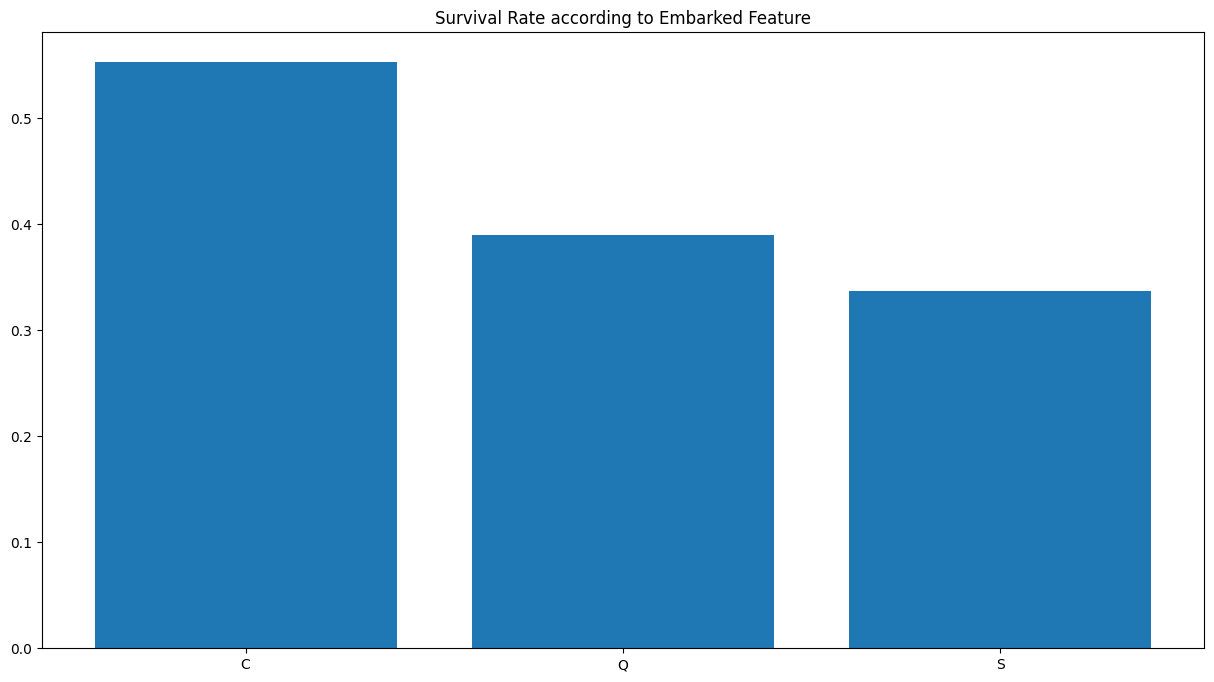

In [10]:
survival_rate_by_embarked = df.groupby("Embarked")["Survived"].mean()

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(survival_rate_by_embarked.index, survival_rate_by_embarked.values)
ax.set(title="Survival Rate according to Embarked Feature")

[Text(0.5, 1.0, 'Survival Rate according to the Title of the Passenger')]

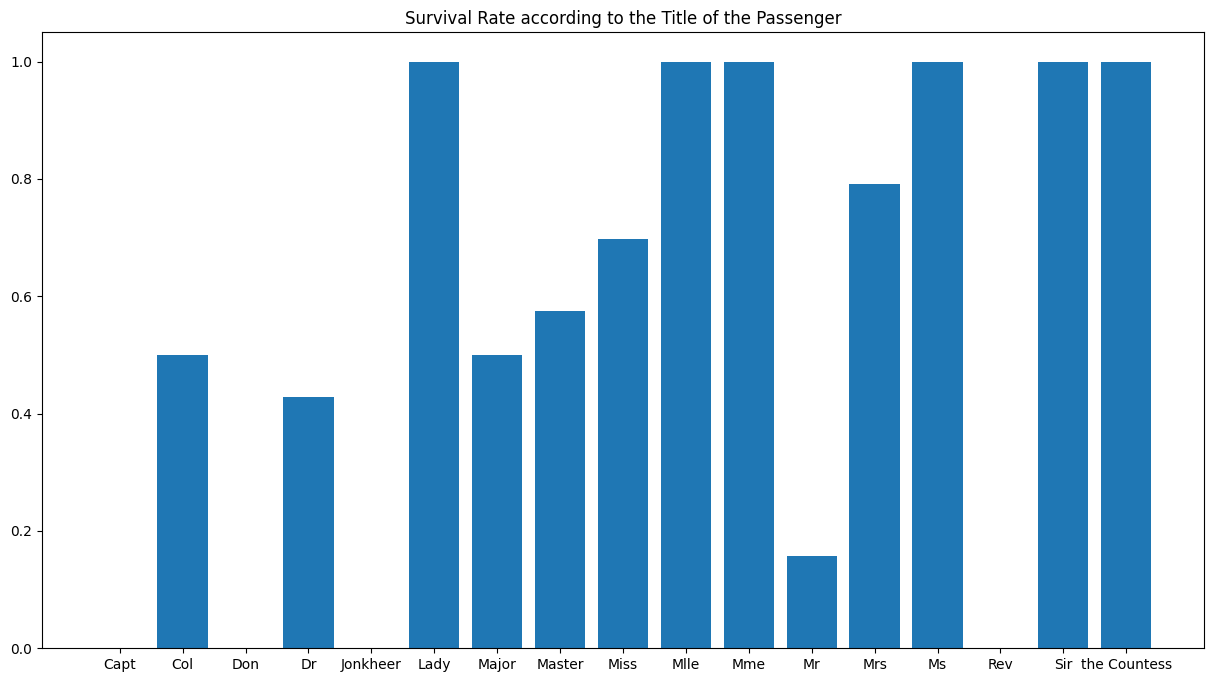

In [11]:
df["Title"] = df["Name"].str.extract(r",\s*([^\.]*)\s*\.", expand=False)

survival_rate_by_titles = df.groupby("Title")["Survived"].mean()

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(survival_rate_by_titles.index, survival_rate_by_titles.values)
ax.set(title="Survival Rate according to the Title of the Passenger")

In [12]:
df["Deck"] = df["Cabin"].str[0]

In [13]:
df["Deck"].value_counts()

Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

[Text(0.5, 1.0, 'Survival Rate according to the Deck')]

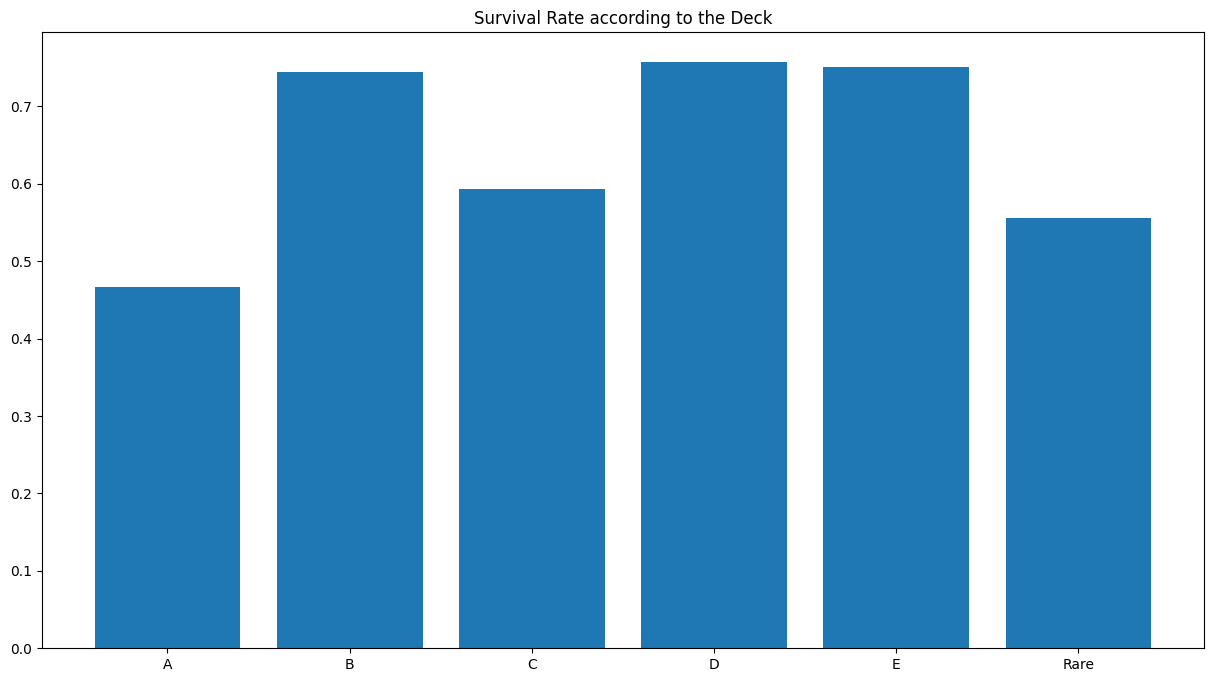

In [14]:
df["Deck"] = df["Deck"].replace({"F": "Rare", "G": "Rare", "T": "Rare"})

survival_rate_by_deck = df.groupby("Deck")["Survived"].mean()
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(survival_rate_by_deck.index, survival_rate_by_deck.values)
ax.set(title="Survival Rate according to the Deck")

We handle now the missing values and transformation of categorical values into numerical values

In [15]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

In [16]:
#missing categorical features
missing_cat_features = ["Embarked", "Deck"]

missing_cat_transformer = Pipeline(steps=[
                                 ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                 ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

In [17]:
#encoding not missing categorical features
not_missing_categorical_features = ["Age Group", "Fare Groups", "Sex", "Title"]

cat_transformer = Pipeline(steps=[
                            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

In [18]:
preprocessor = ColumnTransformer(transformers=[
                                    ("missing_cat", missing_cat_transformer, missing_cat_features),
                                    ("cat", cat_transformer, not_missing_categorical_features)])


In [19]:
#Split the dataset for training and testing

from sklearn.model_selection import train_test_split

X = df.drop(columns=["PassengerId", "Survived", "Age", "Ticket", "Name", "Age", "Fare", "Cabin"])
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

In [21]:
models = {"Linear SVC": LinearSVC(), 
          "KNN": KNeighborsClassifier(), 
          "SVC": SVC(), 
          "Random Forest Classifier": RandomForestClassifier(),
          "Logistic Regression":LogisticRegression(),
          "Naive Bayes": GaussianNB(),
          "XGBoost":XGBClassifier()}

In [22]:
#testing several models to choose the one with the highest accuracy

import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)

results_accuracy = {}
results_f1 = {}
results_precision = {}
results_recall = {}
results_confusion_matrix = {}

for model_name, model in models.items():
    model_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)])
    model_pipeline.fit(X_train, y_train)
    y_predict = model_pipeline.predict(X_test)
    results_accuracy[model_name] = accuracy_score(y_test, y_predict) 
    results_f1[model_name] = f1_score(y_test, y_predict)
    results_precision[model_name] = precision_score(y_test, y_predict) 
    results_recall[model_name] = recall_score(y_test, y_predict)
    results_confusion_matrix[model_name] = confusion_matrix(y_test, y_predict)


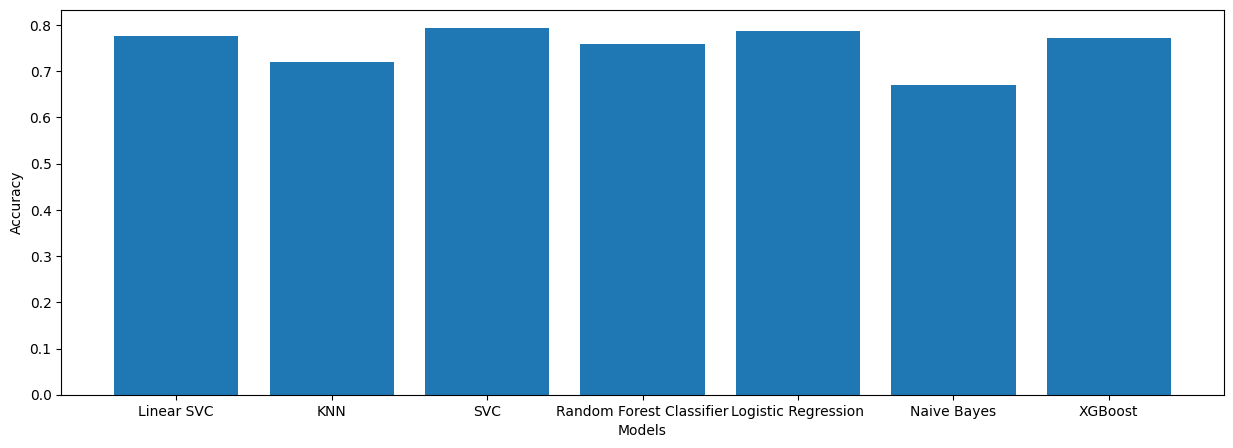

In [23]:
plt.figure(figsize=(15, 5))
plt.bar(results_accuracy.keys(), results_accuracy.values())
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

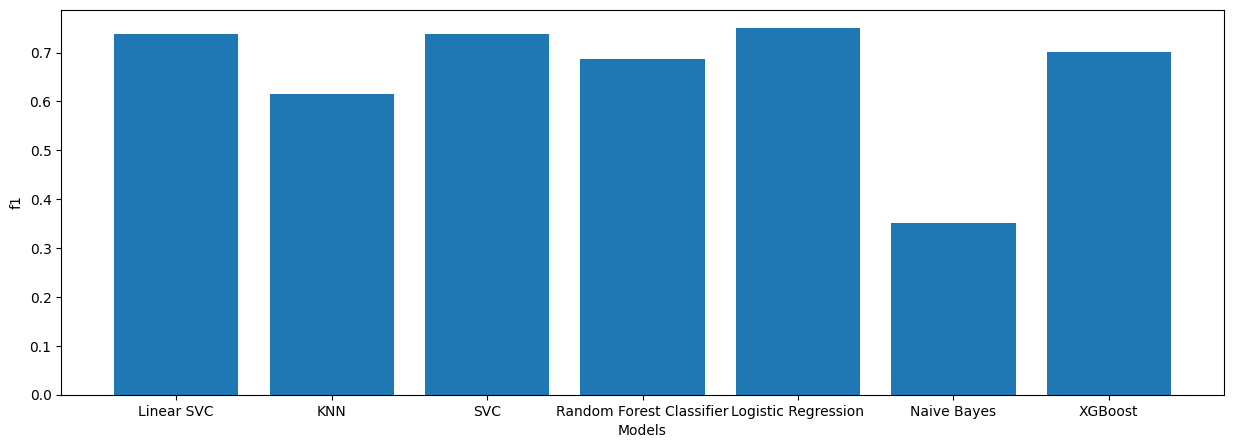

In [24]:
plt.figure(figsize=(15, 5))
plt.bar(results_f1.keys(), results_f1.values())
plt.xlabel("Models")
plt.ylabel("f1")
plt.show()

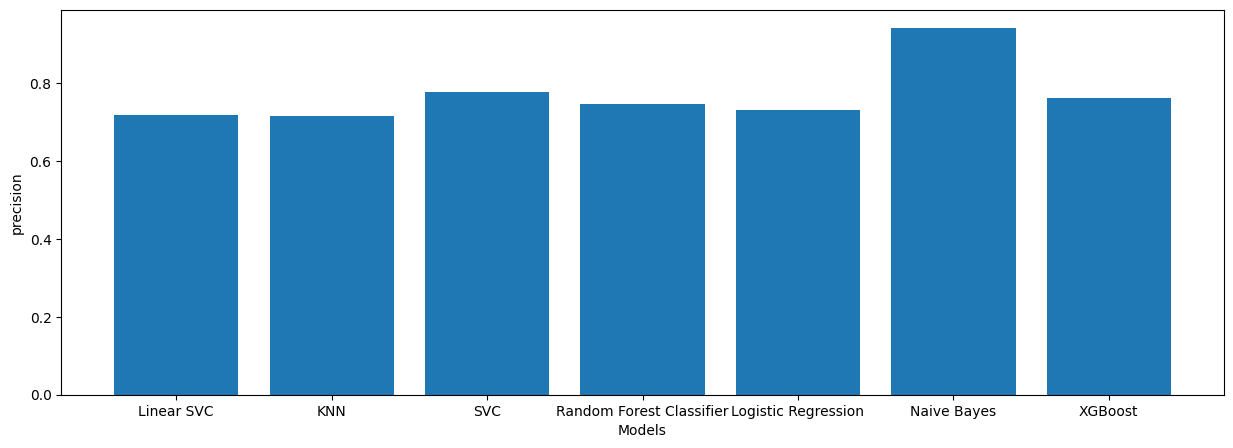

In [25]:
plt.figure(figsize=(15, 5))
plt.bar(results_precision.keys(), results_precision.values())
plt.xlabel("Models")
plt.ylabel("precision")
plt.show()

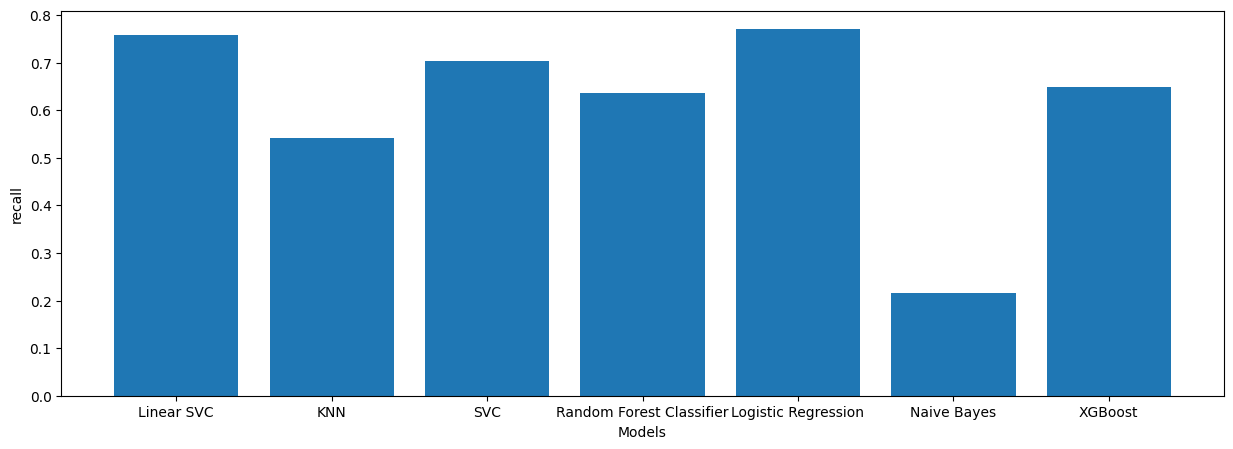

In [26]:
plt.figure(figsize=(15, 5))
plt.bar(results_recall.keys(), results_recall.values())
plt.xlabel("Models")
plt.ylabel("recall")
plt.show()

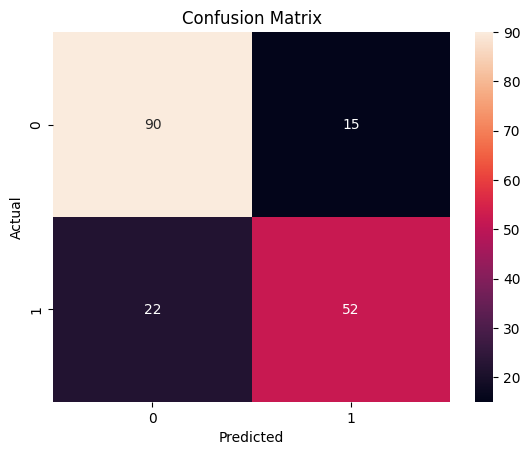

In [27]:
import seaborn as sns

sns.heatmap(results_confusion_matrix["SVC"], annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

We choose SVC (having the highest accuracy). Now we use Grid Search to get the best parameters for the model

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__C': [0.1, 1, 10],      
    'model__kernel': ['linear', 'rbf']
}

model = SVC()

SVC_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)])

grid_search = GridSearchCV(estimator=SVC_pipeline, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1)


grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'model__C': 1, 'model__kernel': 'rbf'}
Best Accuracy: 0.8005318625036935


In [33]:
import joblib

# Save the model with the best parameters
joblib.dump(grid_search, 'Titanic_Survival_Predictor.pkl')


['Titanic_Survival_Predictor.pkl']